<h1><center>ConvEmo</h1>

In [1]:
import numpy as np
import pandas as pd
import csv
import codecs

### Data Processing

In [2]:
turn1 = []
turn2 = []
turn3 = []
labels = []
line_count = 0

d = {'happy':0, 'sad':1, 'angry':3, 'others':4}

with codecs.open('train.txt',encoding="utf-8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    for row in csv_reader:
        if(line_count!=0):
            turn1.append(row[1])
            turn2.append(row[2])
            turn3.append(row[3])
            labels.append(d[row[4]])
        line_count+=1

In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sid = SentimentIntensityAnalyzer()

turn1_sentiment = []
turn2_sentiment = []
turn3_sentiment = []

### Getting the Sentiments

#### Sentiment - Turn 1

In [5]:
for t in turn1:
    s = sid.polarity_scores(t)
    compound = s['compound']
    turn1_sentiment.append(compound)

#### Sentiment - Turn 2

In [6]:
for t in turn2:
    s = sid.polarity_scores(t)
    compound = s['compound']
    turn2_sentiment.append(compound)

#### Sentiment - Turn 3

In [7]:
for t in turn3:
    s = sid.polarity_scores(t)
    compound = s['compound']
    turn3_sentiment.append(compound)

#### Preparing numPy array

In [8]:
X = np.array(list(zip(turn1_sentiment, turn2_sentiment)))
y = np.array(labels)

### Visualizing the Sentiments

In [62]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12,12)

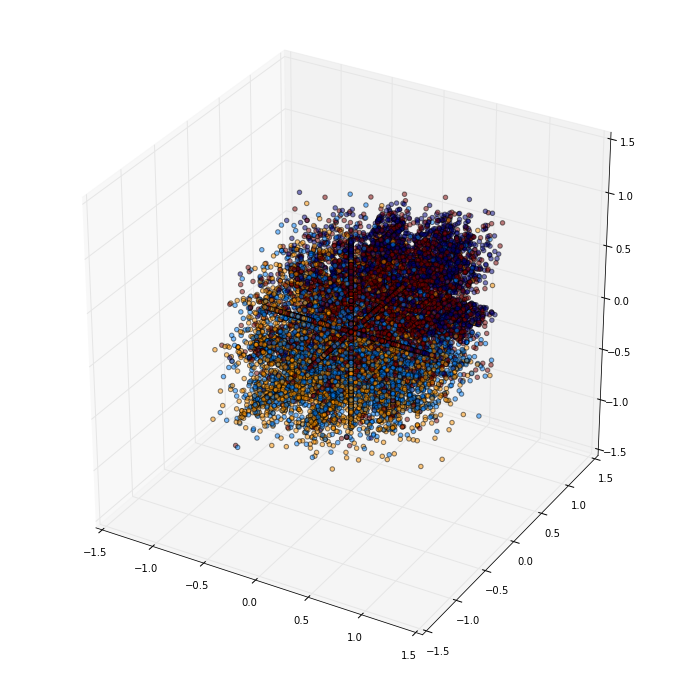

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(turn1_sentiment),np.array(turn2_sentiment),np.array(turn3_sentiment), c=y, alpha=0.5)
plt.show()

### Using SVM for Classification (2 feature : turn1 and turn2)

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
model = svm.SVC(gamma='auto')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
print("Train Score : ",model.score(X_train,y_train))
print("Test Score : ",model.score(X_test,y_test))

y_pred = model.predict(X_test)
print("Test Accuracy Score : ",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Train Score :  0.5312085543766578
Test Score :  0.524867374005305
Test Accuracy Score :  0.524867374005305
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       811
           1       0.33      0.00      0.00      1120
           3       0.43      0.28      0.34      1122
           4       0.54      0.96      0.69      2979

   micro avg       0.52      0.52      0.52      6032
   macro avg       0.33      0.31      0.26      6032
weighted avg       0.41      0.52      0.40      6032



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Using SVM for Classification (3 feature : turn1 and turn2 and turn3)

In [14]:
X = np.array(list(zip(turn1_sentiment, turn2_sentiment,turn3_sentiment)))
y = np.array(labels)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
model = svm.SVC(gamma='auto')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
print("Train Score : ",model.score(X_train,y_train))
print("Test Score : ",model.score(X_test,y_test))

y_pred = model.predict(X_test)
print("Test Accuracy Score : ",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Train Score :  0.6042357427055703
Test Score :  0.603945623342175
Test Accuracy Score :  0.603945623342175
              precision    recall  f1-score   support

           0       0.57      0.08      0.13       811
           1       0.45      0.18      0.25      1120
           3       0.52      0.58      0.55      1122
           4       0.65      0.92      0.76      2979

   micro avg       0.60      0.60      0.60      6032
   macro avg       0.55      0.44      0.42      6032
weighted avg       0.58      0.60      0.54      6032



### Using SVM for Classification 5 with fold CV (3 feature : turn1 and turn2 and turn3)

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X , y , cv=5)

In [20]:
i=1
for s in scores:
    print("CV ",str(i),"\t:  ",s)
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV  1 	:   0.5873384156446801
CV  1 	:   0.5839549146361678
CV  1 	:   0.5857782197911486
CV  1 	:   0.5885572139303482
CV  1 	:   0.5852404643449419

Accuracy: 0.59 (+/- 0.00)


### Using Logistic Regression for Classification 5 with fold CV (3 feature : turn1 and turn2 and turn3)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [23]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
print("Train Score : ",clf.score(X_train,y_train))
print("Test Score : ",clf.score(X_test,y_test))

Train Score :  0.59279675066313
Test Score :  0.5971485411140584


In [25]:
y_pred = clf.predict(X_test)
print("Test Accuracy Score : ",accuracy_score(y_test, y_pred))

Test Accuracy Score :  0.5971485411140584


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.22      0.32       811
           1       0.37      0.06      0.10      1120
           3       0.52      0.56      0.54      1122
           4       0.63      0.92      0.75      2979

   micro avg       0.60      0.60      0.60      6032
   macro avg       0.53      0.44      0.43      6032
weighted avg       0.56      0.60      0.53      6032



In [27]:
w = clf.coef_
w

array([[ 2.05193426,  0.71238797,  4.16931086],
       [-0.9147543 , -0.32628497, -2.36566569],
       [-1.87588252, -0.34032191, -3.31726628],
       [ 0.73870256, -0.04578109,  1.51362111]])